# Gun Violence Data - Time Series Analysis
### Time series analysis for Gun Violence Data (2014-2021)

#### This script contains the following:
1. Importing your libraries and data
2. Subsetting, wrangling, and cleaning time-series data
3. Time series analysis: decomposition
4. Testing for stationarity
5. Stationarizing for Gun Violence Data
6. Final Analysis

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 
warnings.filterwarnings("ignore") 
plt.style.use('fivethirtyeight')

In [2]:
#define path 
path=r'/Users/yeji/Documents/Career Foundry/Achievement 6'

In [3]:
#import data
df = pd.read_csv(os.path.join(path,'Data', 'Prepared Data', 'data_with_regions.csv'), index_col = 0)

In [4]:
#check head
df.head()

,incident_id,incident_date,month,day,year,state,city_or_county,address,killed,injured,Regions,year category
0,2201535,December 31 2021,December,31,2021,Maryland,Capitol Heights,Cindy Ln,0,4,South,early 2020s
1,2201716,December 31 2021,December,31,2021,Mississippi,Gulfport,1200 block of Lewis Ave,3,4,South,early 2020s
2,2201216,December 31 2021,December,31,2021,California,Los Angeles,10211 S. Avalon Blvd,0,6,West,early 2020s
3,2200968,December 30 2021,December,30,2021,Pennsylvania,Philadelphia,5100 block of Germantown Ave,0,6,Northeast,early 2020s
4,2201052,December 30 2021,December,30,2021,Missouri,Kirksville,700 block of E Dodson St,2,2,Midwest,early 2020s


### Subsetting, wrangling and cleaning data

In [5]:
#change month to datetime
df['month'] = pd.to_datetime(df['month'], format='%B').dt.month.astype(int)
print (df['month'])

0       12
1       12
2       12
3       12
4       12
        ..
3386     1
3387     1
3388     1
3389     1
3390     1
Name: month, Length: 3389, dtype: int64


In [6]:
#combine month and year to create new dataframe
df['incident_year_month'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str))
print(df['incident_year_month'])

0      2021-12-01
1      2021-12-01
2      2021-12-01
3      2021-12-01
4      2021-12-01
          ...    
3386   2014-01-01
3387   2014-01-01
3388   2014-01-01
3389   2014-01-01
3390   2014-01-01
Name: incident_year_month, Length: 3389, dtype: datetime64[ns]


In [7]:
#create subset with incident_year_month and value counts
df_sub = df['incident_year_month'].value_counts().rename_axis('incident_date').reset_index(name='incident_counts')
print (df_sub)

   incident_date  incident_counts
0     2020-06-01               94
1     2020-07-01               88
2     2021-07-01               86
3     2020-08-01               79
4     2021-06-01               76
..           ...              ...
91    2014-01-01               17
92    2014-03-01               16
93    2018-12-01               15
94    2018-02-01               14
95    2016-01-01               11

[96 rows x 2 columns]


#### Subset reasoning
Subset was created to create a new dataframe containing only the incident dates and counts of each incident per month/year. 


In [8]:
# Check for missing values
df_sub.isnull().sum() 

incident_date      0
incident_counts    0
dtype: int64

In [9]:
# Check for duplicates
dups = df_sub.duplicated()
dups.sum()

0

In [10]:
#change subset to datetime 

df_sub['datetime'] = pd.to_datetime(df_sub['incident_date']) 
df_sub = df_sub.set_index('datetime')
df_sub.drop(['incident_date'], axis=1, inplace=True) 
df_sub.head()

,incident_counts
datetime,
2020-06-01,94
2020-07-01,88
2021-07-01,86
2020-08-01,79
2021-06-01,76


In [11]:
#sort data ascending date
df_sub.sort_values(by='datetime',inplace=True)
print(df_sub)

            incident_counts
datetime                   
2014-01-01               17
2014-02-01               17
2014-03-01               16
2014-04-01               20
2014-05-01               20
...                     ...
2021-08-01               61
2021-09-01               65
2021-10-01               72
2021-11-01               49
2021-12-01               40

[96 rows x 1 columns]


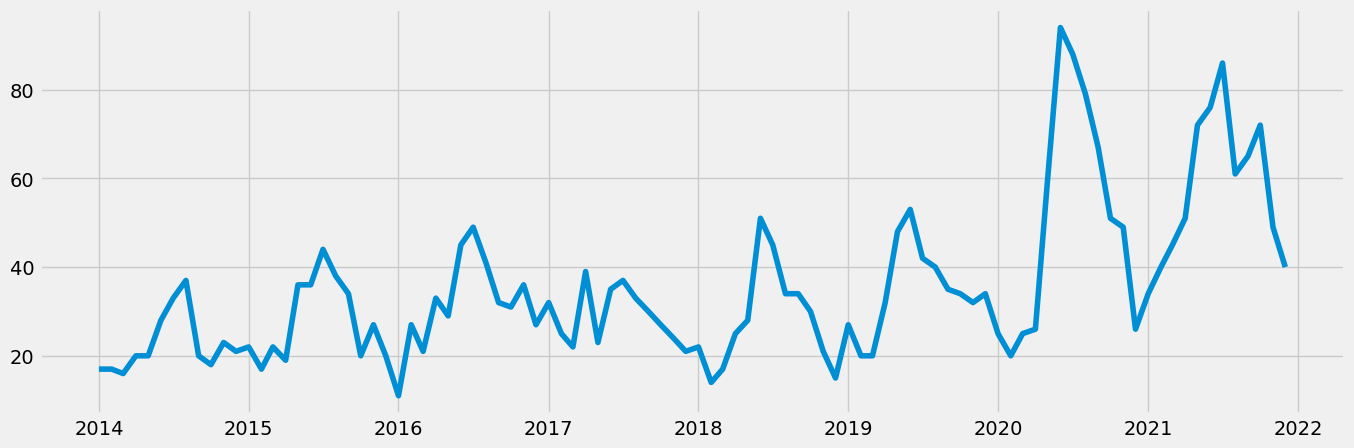

In [12]:
#plot data using matplotlib
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_sub)

In [13]:
#smooth data using moving avg
df_sub['incident_sma']=df_sub['incident_counts'].rolling(10).mean()

,incident_counts,incident_sma
datetime,,
2014-01-01,17,NaN
2014-02-01,17,NaN
2014-03-01,16,NaN
2014-04-01,20,NaN
2014-05-01,20,NaN


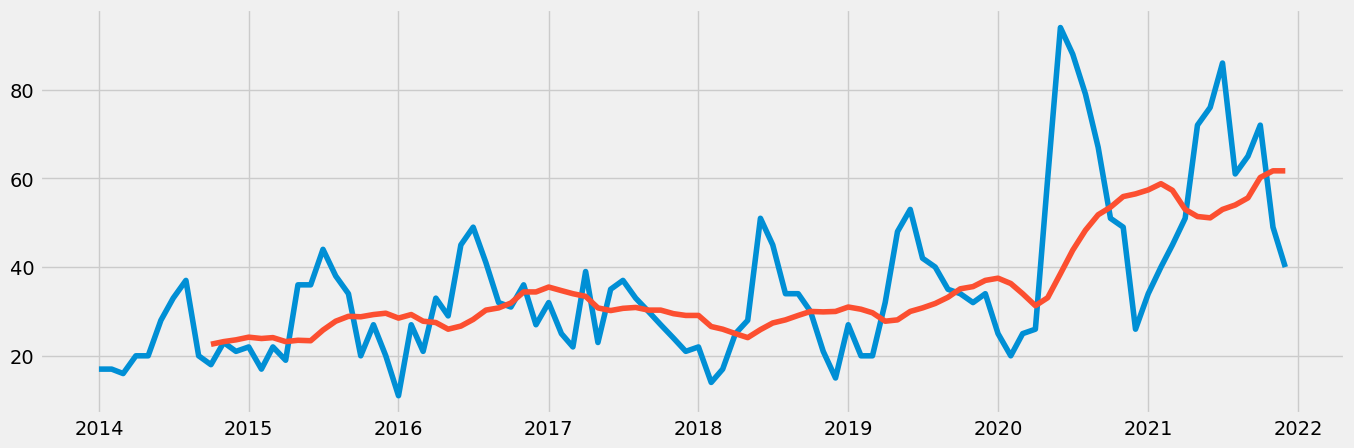

In [15]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_sub)

In [16]:
#new dataset with datetime and sma 
df_new = df_sub.drop('incident_counts', axis=1)

In [17]:
df_new.head()

,incident_sma
datetime,
2014-01-01,NaN
2014-02-01,NaN
2014-03-01,NaN
2014-04-01,NaN
2014-05-01,NaN


In [35]:
#drop missing values
df_sub2 = df_new.dropna()

### Time-series decomposition

In [19]:
# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(df_sub2, model='additive')

In [20]:
#define fixed size for the charts
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

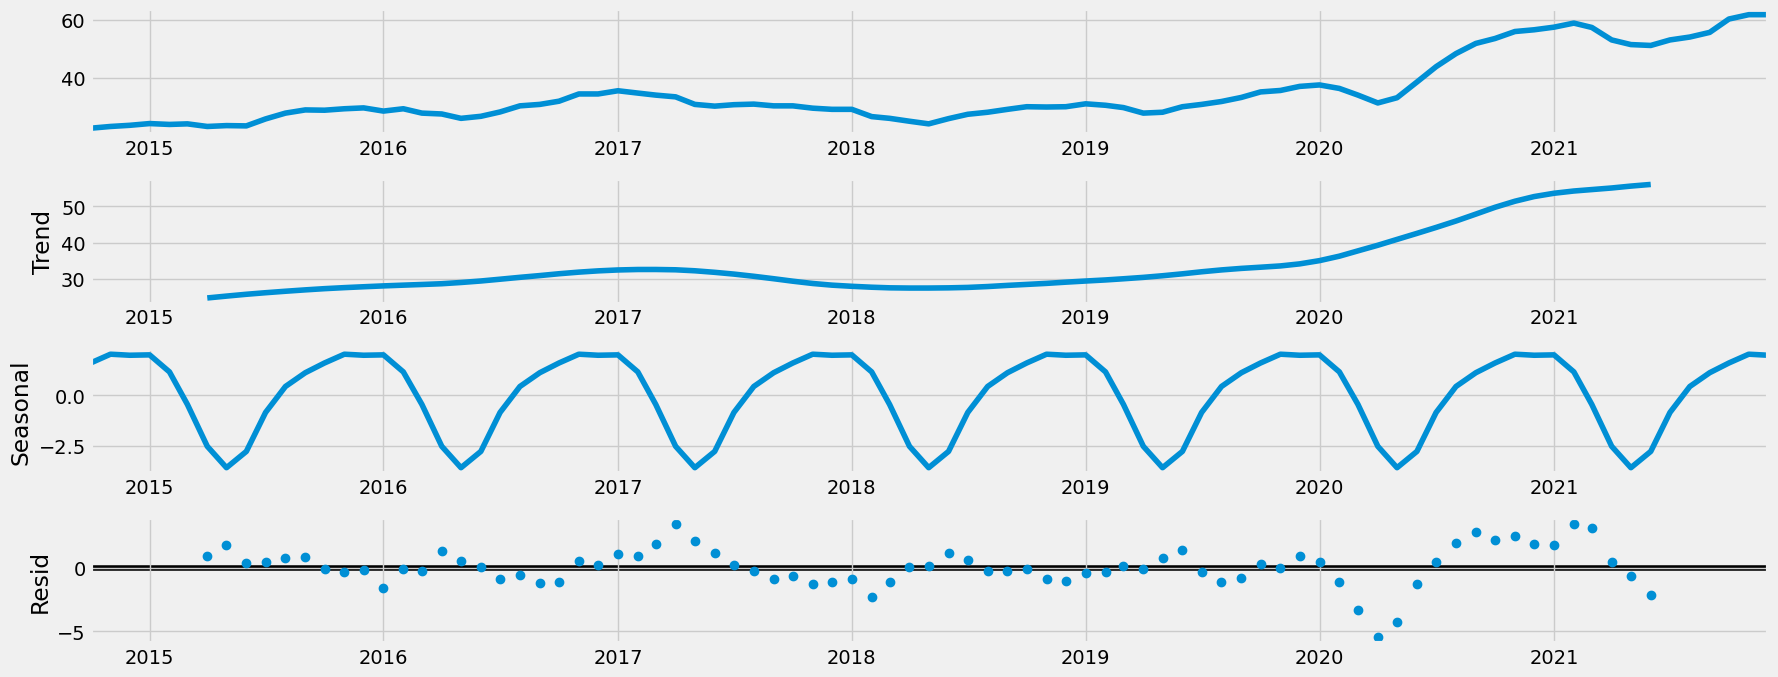

In [50]:
# Plot the separate components
decomposition.plot(())
plt.show()

### Analysis
The decomposition shows that trend line increases, which means more incidents occured throughout the year
The second part shows that there is a seasonality that plays role in the data with the increase in the middle to end of the year.
The last part shows noise which could mean that there was another factor that could've played a role in the data as well. 

### Stationarity testing

In [22]:
#import adfuller function and perform dickey fuller test

from statsmodels.tsa.stattools import adfuller 
def dickey_fuller(timeseries): 
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_sub2['incident_sma'])

Dickey-Fuller Stationarity test:
Test Statistic                 -0.309736
p-value                         0.924114
Number of Lags Used            11.000000
Number of Observations Used    75.000000
Critical Value (1%)            -3.520713
Critical Value (5%)            -2.900925
Critical Value (10%)           -2.587781
dtype: float64


#### Analysis
The test statistic value is extremely larger than both critical values at 5% and 10% therefore null hypthosis cannot be rejected and it is not stationary 

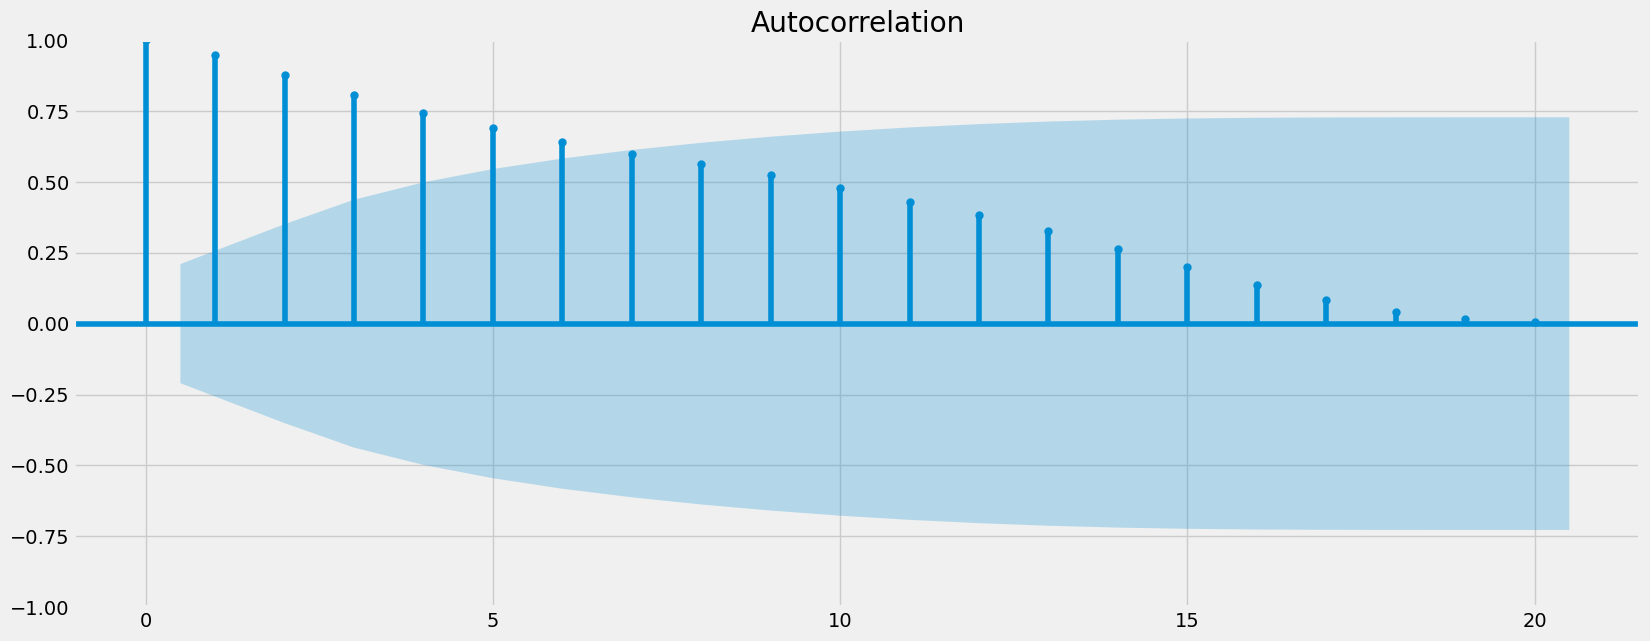

In [23]:
# Check out a plot of autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df_sub2)
plt.show()

#### Analysis
The autocorrelation shows there are 7 lags above the confidence level, which is less than a rule of thumb of having at least 10 lags to do a round of differencing. However, since the dickey fuller test shows larger value in the test statistic, differencing would be necessary.

### Stationarizing

In [24]:
#conduct differencing
df_diff = df_sub2 - df_sub2.shift(1)

In [25]:
#drop missing values 
df_diff.dropna(inplace = True) 

In [26]:
#check head
df_diff.head()

,incident_sma
datetime,
2014-11-01,0.6
2014-12-01,0.4
2015-01-01,0.6
2015-02-01,-0.3
2015-03-01,0.2


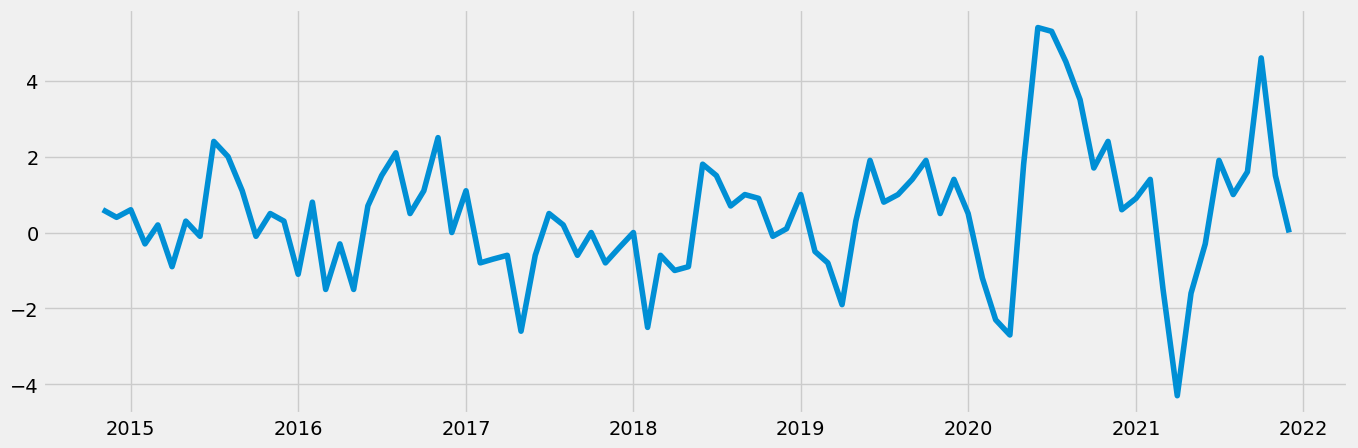

In [27]:
# Check time series curve of differentiated data

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_diff)

In [28]:
#perform dickey fuller test on df_diff
dickey_fuller(df_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -1.640685
p-value                         0.461903
Number of Lags Used            10.000000
Number of Observations Used    75.000000
Critical Value (1%)            -3.520713
Critical Value (5%)            -2.900925
Critical Value (10%)           -2.587781
dtype: float64


#### Analysis
The Dickey-fuller test showed that test statistic is still higher than the critical values, so another round of differentiating is necessary

In [29]:
#2nd round of differentiating
df_diff2 = df_diff - df_diff.shift(1)

In [30]:
#drop missing values for second differentiating
df_diff2.dropna(inplace = True) 

In [31]:
#check head
df_diff2.head()

,incident_sma
datetime,
2014-12-01,-0.2
2015-01-01,0.2
2015-02-01,-0.9
2015-03-01,0.5
2015-04-01,-1.1


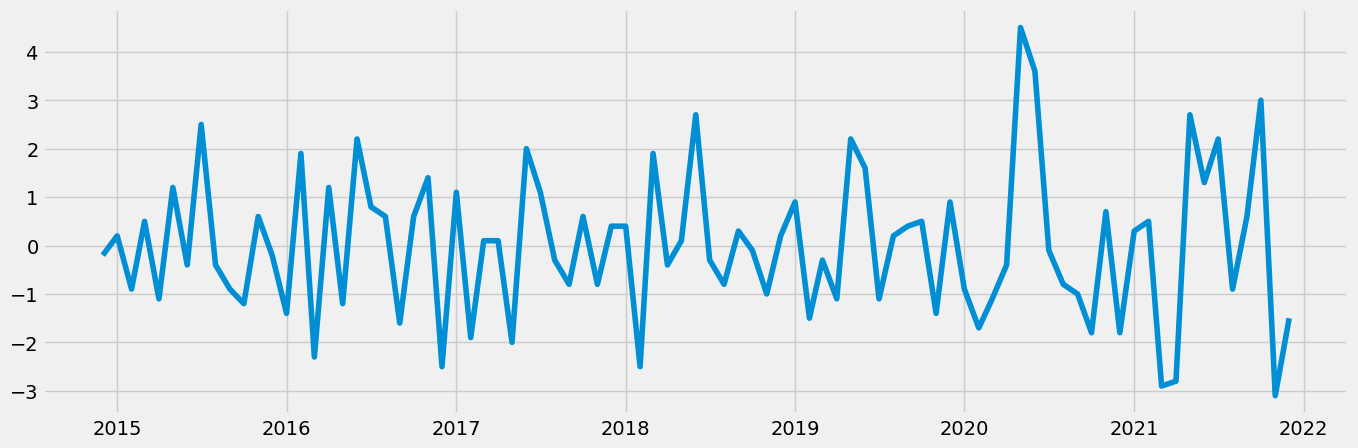

In [32]:
# Check time series curve of second differentiated data

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_diff2)

In [33]:
#perform dickey fuller test on df_diff2
dickey_fuller(df_diff2)

Dickey-Fuller Stationarity test:
Test Statistic                -8.087078e+00
p-value                        1.410422e-12
Number of Lags Used            9.000000e+00
Number of Observations Used    7.500000e+01
Critical Value (1%)           -3.520713e+00
Critical Value (5%)           -2.900925e+00
Critical Value (10%)          -2.587781e+00
dtype: float64


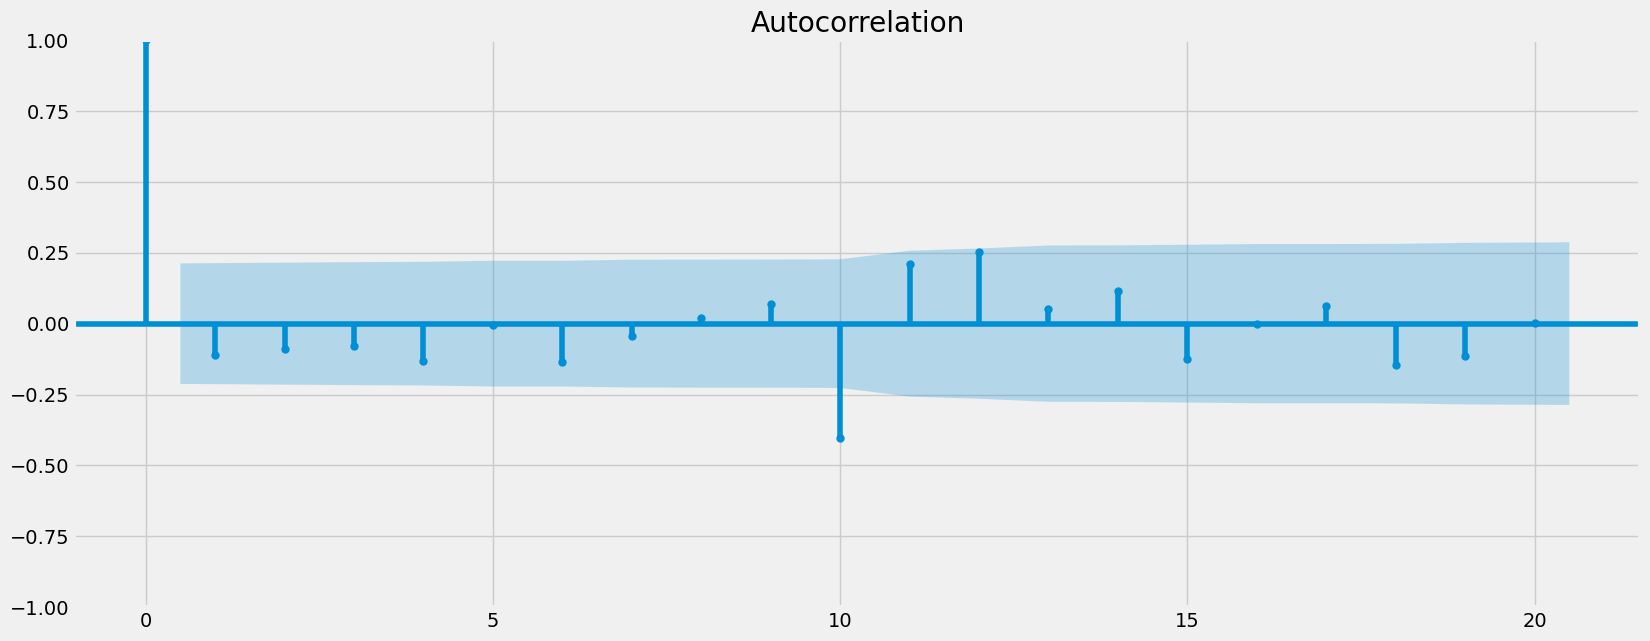

In [34]:
#check autocorrelation
plot_acf(df_diff2)
plt.show()

### Final Analysis
After second round of differentiating, the dickey fuller test showed test statistic less than the critical vlaues of 1%,5% and 10%, which allows us to reject the null hypthosis
Also, the autocorrelation shows only 2 lags above the confidence level, which also shows higher stationarity of the data. 